In [1]:
import numpy as np
import pandas as pd
import datetime
import torch
import matplotlib.pyplot as plt

In [ ]:
tf = np.load('../../bay/data/total_graph.npy')
print(tf)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.59025499]
 [0.         0.         0.         ... 0.         0.59025499 0.        ]]


: 

In [51]:
# tf = np.load('total_graph.npy')
# vds = pd.read_csv('vds_la.csv')
# def cal_dis(i,j):
#     lat1, long1 = vds.latitude[i], vds.longitude[i]
#     lat2, long2 = vds.latitude[j], vds.longitude[j]
#     dist = (lat1-lat2)**2 + (long1-long2)**2
#     return dist

# dists = []
# for i in range(tf.shape[0]):
#     for j in range(tf.shape[1]):
#         if tf[i,j]>0:
#             tf[i,j] = cal_dis(i,j)
#             dists.append(np.sqrt(tf[i,j]))
#         else:
#             tf[i,j] = np.float('inf')
# sigma = np.std(np.array(dists))
# tf = np.exp(-tf/(sigma*sigma))

In [54]:
np.save('total_graph.npy', tf)

In [3]:
## 需要文件, data, events, graph, edge_list
data = np.load('data.npy')
print(data.shape)

(28224, 204, 6, 2)


In [4]:
data_f= data[:,:,:,0].sum(axis=-1)
data_s = data[:,:,:,1].mean(axis=-1)
data1 = np.concatenate((data_f[...,np.newaxis],data_s[...,np.newaxis]),axis =-1)
print(data1.shape)
data2 = data.reshape(data.shape[0],data.shape[1],-1)
print(data2.shape)

(28224, 204, 2)
(28224, 204, 12)


In [37]:
# # graph 
# vds = pd.read_csv('vds_la.csv',index_col=0)
# num_node = len(vds)
# print(num_node)
# graph = np.zeros((num_node,num_node))
# for i in range(num_node):
#     way = vds.freeway[i]
#     pm = vds.abs_pm[i]
#     # print(way,pm)
#     vds_tmp = vds[vds.freeway==way]
#     vds_tmp['distance'] = vds_tmp['abs_pm']-pm
#     if way[-1] in ['N','E']:
#         try:
#             idx = vds_tmp[vds_tmp['distance']>0]['distance'].idxmin()
#         except:
#             idx = None
#     else:
#         try:
#             idx = vds_tmp[vds_tmp['distance']<0]['distance'].idxmax()
#         except:
#             idx = None
#     if idx:
#         graph[i,idx]=1
# np.save('total_graph.npy',graph)
# for i in range(graph.shape[0]):
#     for j in range(graph.shape[1]):
#         if graph[i,j]>0:
#             graph[j,i] = graph[i,j]
# np.save('asy_graph.npy',graph)

204


/tmp/ipykernel_1377146/913620605.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vds_tmp['distance'] = vds_tmp['abs_pm']-pm
/tmp/ipykernel_1377146/913620605.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vds_tmp['distance'] = vds_tmp['abs_pm']-pm
/tmp/ipykernel_1377146/913620605.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [4]:
e = np.load('edge_list.npy')
# edge_list=[]
# count = 0
# for i in range(graph.shape[0]):
#     for j in range(graph.shape[0]):
#         if graph[i,j]>0:
#             edge_list.append((i,j))
#             count +=1
# print(count)
# np.save('edge_list.npy',np.array(edge_list))


In [5]:
events = pd.read_csv('total_event.csv',index_col=0)
events = events[events['duration']>10]
events = events.reset_index()
# print(events.head())
# data = np.load('data.npy')
# print(data.shape)
vds = pd.read_csv('vds_la.csv',index_col=0)
print(events.head())
graph = np.load('total_graph.npy')
print((graph>0).sum())
asygraph = np.load('asy_graph.npy')
print((asygraph>0).sum())
print(events['duration'].mean())
print(len(events))

   Incident Id      Start Time  duration freeway  CA PM  Abs PM Source  \
0     16919585  2017/1/2 16:52        37  I110-N  27.07    27.0    CHP   
1     16920745   2017/1/3 9:29       319  I110-N  25.47    25.4    CHP   
2     16925895  2017/1/5 12:20        20  I110-N  27.07    27.0    CHP   
3     16925897  2017/1/5 12:18        11  I110-N  27.07    27.0    CHP   
4     16927602   2017/1/6 8:38       105  I110-N  27.07    27.0    CHP   

         AREA                 LOCATION                   DESCRIPTION  
0  Central LA  Sr110 N - Avenue 43 Ofr  1183-Trfc Collision-Unkn Inj  
1  Central LA  Sr110 N I5 N Con - I5 N             CLOSURE of a Road  
2       LAFSP  Sr110 N - Avenue 43 Ofr  1183-Trfc Collision-Unkn Inj  
3  Central LA  Sr110 N - Avenue 43 Ofr  1183-Trfc Collision-Unkn Inj  
4  Central LA  Sr110 N - Avenue 43 Ofr           1125-Traffic Hazard  
187
374
46.849806451612906
3875


In [6]:
date_range = pd.date_range('2017/1/1 00:00','2017/4/8 23:59',freq='5t')
def local_match(freeway, pm, thre):
    # first seletion
    indicator=0
    f_vds = vds[vds['freeway']==freeway].copy()
    f_vds['distance'] = f_vds['abs_pm']-pm
    if (f_vds['distance']>0).all():
        upsensor_id = -1
        downsensor_id =  f_vds['distance'].idxmin()
        if abs(f_vds.loc[downsensor_id,'distance'])<thre:
            sensor_id = downsensor_id
        else:
            sensor_id = -1
    elif (f_vds['distance']<0).all():
        downsensor_id = -1
        upsensor_id =  f_vds['distance'].idxmax()
        if abs(f_vds.loc[upsensor_id,'distance'])<thre:
            sensor_id = upsensor_id
        else:
            sensor_id = -1
    else:
        upsensor_id = f_vds[f_vds['distance']<0]['distance'].idxmax()
        downsensor_id =  f_vds[f_vds['distance']>=0]['distance'].idxmin()
        if downsensor_id in f_vds.index.tolist():
            indicator =1
        
        updist = abs(f_vds.loc[upsensor_id,'distance'])
        downdist = abs(f_vds.loc[downsensor_id,'distance'])

        if updist>thre and downdist>thre:
            sensor_id = -1
        else:
            if updist<downdist:
                sensor_id = upsensor_id
            else:
                sensor_id = downsensor_id
    return sensor_id, upsensor_id, downsensor_id

def local_match2(freeway, pm, thre):
    # first seletion
#     indicator = False
    f_vds = vds[vds['freeway']==freeway].copy()
    f_vds['distance'] = f_vds['abs_pm']-pm
    n_id = abs(f_vds['distance']).idxmin()
    n_dist = abs(f_vds['distance']).min()
    
    if (f_vds['distance']>0).all():
        upsensor_id = -1
        downsensor_id =  f_vds['distance'].idxmin()
        if abs(f_vds.loc[downsensor_id,'distance'])<thre:
            sensor_id = downsensor_id
        else:
            sensor_id = -1
    elif (f_vds['distance']<0).all():
        downsensor_id = -1
        upsensor_id =  f_vds['distance'].idxmax()
        if abs(f_vds.loc[upsensor_id,'distance'])<thre:
            sensor_id = upsensor_id
        else:
            sensor_id = -1
    else:
        sensor_id = -1
        if freeway[-1] in ['N', 'E']:
            upsensor_id = f_vds[f_vds['distance']<0]['distance'].idxmax()
#             downsensor_ids =  [[f_vds[f_vds['distance']>=0]['distance'].idxmin()]]
        else:
            upsensor_id = f_vds[f_vds['distance']>0]['distance'].idxmin()
#             downsensor_ids =  [[f_vds[f_vds['distance']<=0]['distance'].idxmax()]]
        updist = abs(f_vds.loc[upsensor_id,'distance'])
        downsensor_ids = np.argwhere(asygraph[upsensor_id]>0)
#         print(upsensor_id, downsensor_idx)
#         print(downsensor_ids)
#         indicator = not ([downsensor_idx] in downsensor_ids)
        if len(downsensor_ids):
            for downsensor in downsensor_ids:
                if downsensor[0] in f_vds.index.tolist():
                    downdist = abs(f_vds.loc[downsensor,'distance'].values)  
                    downsensor_id = downsensor[0]
                    if updist>thre and downdist>thre:
                        pass
                    else:
                        if updist<downdist:
                            sensor_id = upsensor_id
                        else:
                            sensor_id = downsensor_id
                    break
                else:
#                     indicator = True
                    if updist<thre:
                        sensor_id = upsensor_id
                    downsensor_id = downsensor[0]
        else:
            indicator = True
            if updist<thre:
                sensor_id = upsensor_id
            downsensor_id = -1
    return sensor_id, upsensor_id, downsensor_id, n_id, n_dist


def time_match(start_time, duration):
    begin_date=date_range[date_range>=start_time][0]
    end_date = date_range[date_range<=pd.to_datetime(start_time)+datetime.timedelta(minutes=int(duration))][-1]
    begin, end = np.argwhere(date_range==begin_date)[0,0],np.argwhere(date_range==end_date)[0,0] # date to time step
    return begin, end


# match function
label_v = np.zeros((data.shape[0],data.shape[1]))
label_e = np.zeros((data.shape[0],graph.shape[0],graph.shape[0]))
node_event, edge_event = 0, 0
thre = 0.15
nears = []
times = []
for i in range(events.shape[0]):
    event = events.loc[i]
    # 确定事件发生的最近点
    freeway, pm = event.freeway, float(event['Abs PM'])
    sensor_id, upsensor_id, downsensor_id, n_id, n_dist = local_match2(freeway, pm, thre)
    nears.append((n_id,n_dist))
#     print(sensor_id, upsensor_id, downsensor_id)
    # 标注故障时间
    start_time ,duration = event['Start Time'], event.duration
    begin, end = time_match(start_time,duration)
    times.append(begin)
    if sensor_id == -1 and upsensor_id>=0 and downsensor_id>=0:
        label_e[begin:end+1, upsensor_id, downsensor_id]=1
        label_e[begin:end+1, downsensor_id, upsensor_id]=1
        edge_event += 1
    elif sensor_id>=0:
        label_v[begin:end+1, sensor_id]=1
        node_event += 1     

locals = [a[0] for a in nears]
dist = [a[1] for a in nears]

print(edge_event)
print(node_event)

2428
1447


In [7]:
np.save('event_label_v_only.npy',label_v)

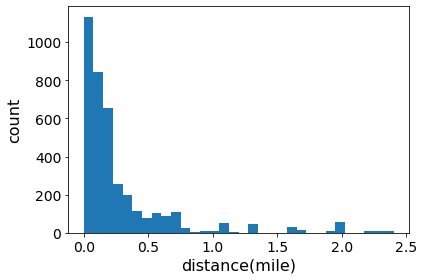

In [50]:
# print(times[1278])
# a = data1[times[1278]-48+2016:times[1278]+48+2016,locals[1278]]
# print(a.shape)
# b= np.zeros(3)
# c= np.zeros(3)
# print(np.corrcoef(b,c))
plt.figure()
plt.hist(dist,32)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('distance(mile)',fontsize=16)
plt.ylabel('count',fontsize=16)
plt.tight_layout()
plt.savefig('output.eps',dpi=400)
plt.show()


In [8]:
print(data1.shape)
data3 = data1.reshape(-1, 2016, 365, 2).mean(axis=0)
data4 = data1.reshape(-1, 2016, 365, 2).std(axis=0)
print(data3.shape)
print(data4.shape)

(36288, 365, 2)
(2016, 365, 2)
(2016, 365, 2)


In [12]:
def event_stat1(data, locals, times, dist, dua=12, flow=True):
    drops = {}
    for i in range(160):
        drops[str(i)]=[0]
    ori = {}
    for i in range(160):
        ori[str(i)]=[0]
    
    for i in range(len(locals)):
        if flow:
            record = data[times[i] - dua: times[i] + dua, locals[i],0] #(T,)
            his = data[(times[i] - dua)%2016: (times[i] + dua)%2016, locals[i],0] #(T,)
            stds = data4[(times[i] - dua)%2016: (times[i] + dua)%2016, locals[i], 0]
        else:
            record = data[times[i] - dua: times[i] + dua, locals[i],1] #(T,)
            his = data[(times[i] - dua)%2016: (times[i] + dua)%2016, locals[i],1] #(T,)
            stds = data4[(times[i] - dua)%2016: (times[i] + dua)%2016, locals[i], 1] #(T, )
        
        no = record[:dua] 
        no_his = his[:dua]
        ab = record[dua:]
        ab_his = his[dua:]


        if his.shape[0]==(dua*2) and record.shape[0]==(dua*2):
            # no_sim = np.mean(np.abs(no - no_his))
            # ab_sim = np.mean(np.abs(ab - ab_his))
            no_sim = np.abs(np.mean(no - no_his))
            ab_sim = np.abs(np.mean(ab - ab_his))
            # drop = np.max(ab_sim-no_sim,0)
            drops[str(int(dist[i]//0.01))].append(ab_sim)
            ori[str(int(dist[i]//0.01))].append(no_sim)
    
    # print(drops)      
    result = []
    oris = []
    for i in range(160):
        # result.append(np.max(drops[str(i)]))
        if len(drops[str(i)])>2:
            result.append(np.sort(drops[str(i)])[-3])
        else:
            result.append(0)
        oris.append(np.mean(ori[str(i)]))
    return result,oris

def event_stat2(data, locals, times, dua=12, flow=True):
    drops = {}
    for i in range(160):
        drops[str(i)]=[0]
    for i in range(len(locals)):
        if flow:
            record = data[times[i] - dua: times[i] + dua, locals[i],0] #(T, D)
            his = data[(times[i] - dua)%2016: (times[i] + dua)%2016, locals[i],0] #(T, D)
        else:
            record = data[times[i] - dua: times[i] + dua, locals[i],1] #(T, D)
            his = data[(times[i] - dua)%2016: (times[i] + dua)%2016, locals[i],1] #(T, D)
        # print(record.shape)
        no = record[:dua] 
        no_his = his[:dua]
        ab = record[dua:]
        ab_his = his[dua:]
        if his.shape[0]==(dua*2) and record.shape[0]==(dua*2):
            no_sim = np.corrcoef(no,no_his)[0,1]
            ab_sim = np.corrcoef(ab,ab_his)[0,1]
            drop = (no_sim - ab_sim)
            if not np.isnan(drop):
                drops[str(int(dist[i]//0.01))].append(drop)
    # print(drops)      
    result = []
    for i in range(160):
        # result.append(np.mean(drops[str(i)]))
        if len(drops[str(i)])>2:
            result.append(np.sort(drops[str(i)])[-3])
        else:
            result.append(0)
    return result

drop1,ori1 = event_stat1(data1, locals, times, dist, dua=48, flow=True)
drop11 = [np.mean(drop1[:i]) for i in range(160)]  # (i:i+5)
ori11 = [np.mean(ori1[i:i+5]) for i in range(160)]
drop2 = event_stat2(data2, locals, times, dua=48, flow=True)
drop22 = [np.mean(drop2[:i]) for i in range(160)]
fig = plt.figure()
ax1 = fig.add_subplot(111)
ins1=ax1.plot(np.arange(0,1.6,0.01),drop11,color='#FF69B4',label='M/L')
ax2 = ax1.twinx()
ins2=ax2.plot(np.arange(0,1.6,0.01),drop22,color='#1E90FF',label='M/P')
labs=[l.get_label() for l in (ins1+ins2)]
ax1.legend(ins1+ins2,labs,fontsize=16)
# ax3 = fig.add_subplot(313)
# plt.plot(np.array(drop22)-np.array(ori11))
# ax1.set_xticks(np.arange(0, 1.6,0.1))
ax1.tick_params(labelsize=14)
ax1.set_yticks(np.arange(0,15,2))
plt.tick_params(labelsize=14)
ax2.set_yticks(np.arange(0,1.1,0.2))
ax2.tick_params(labelsize=14)
ax1.set_xlabel('Distance threshold(mile)',fontsize=15)
ax1.set_ylabel('Mean Metric(L-1)',fontsize=15)
ax2.set_ylabel('Mean Metric(PCC)',fontsize=15)
plt.subplots_adjust(right=0.88)
# plt.savefig('output.png',dpi=300)
plt.show()
# plt.savefig('output.eps',dpi=300)

NameError: name 'data4' is not defined

In [ ]:
def event_stat1(data, locals, times, dua=12, flow=True):
    drops = []
    for i in range(len(locals)):
        if flow:
            record = data[times[i] - dua: times[i] + dua, locals[i],0] #(T,)
            his = data[times[i] - dua - 2016: times[i] + dua- 2016, locals[i],0] #(T,)
        else:
            record = data[times[i] - dua: times[i] + dua, locals[i],1] #(T,)
            his = data[times[i] - dua - 2016: times[i] + dua- 2016, locals[i],1] #(T,)
        no = record[:dua] 
        no_his = his[:dua]
        ab = record[dua:]
        ab_his = his[dua:]
        if his.shape[0]==(dua*2) and record.shape[0]==(dua*2):
            no_sim = np.mean(np.abs(no - no_his))
            ab_sim = np.mean(np.abs(ab - ab_his))
            drop = ab_sim-no_sim
            drops.append(drop)

    return np.mean(drops)

def event_stat2(data, locals, times, dua=12, flow=True):
    drops = []
    for i in range(len(locals)):
        if flow:
            record = data[times[i] - dua: times[i] + dua, locals[i],0] #(T, D)
            his = data[times[i] - dua + 2016: times[i] + dua+ 2016, locals[i],0] #(T, D)
        else:
            record = data[times[i] - dua: times[i] + dua, locals[i],1] #(T, D)
            his = data[times[i] - dua + 2016: times[i] + dua+ 2016, locals[i],1] #(T, D)
        # print(record.shape)
        no = record[:dua] 
        no_his = his[:dua]
        ab = record[dua:]
        ab_his = his[dua:]
        if his.shape[0]==(dua*2) and record.shape[0]==(dua*2):
            no_sim = np.corrcoef(no,no_his)[0,1]
            ab_sim = np.corrcoef(ab,ab_his)[0,1]
            drop = (no_sim - ab_sim)
            if not np.isnan(drop):
                drops.append(drop)
            # print(i,drop)
    return np.mean(drops)

drop1 = event_stat1(data1, locals, times, dua=12, flow=False)
print(drop1)
drop2 = event_stat2(data2, locals, times, dua=12, flow=False)
print(drop2)

In [29]:
def event_divide(data, locals, times, dua=48, flow=True):
    drops = []
    for i in range(len(locals)):
        if flow:
            record = data[times[i] - dua: times[i] + dua, locals[i],:6] #(T, D)
        else:
            record = data[times[i] - dua: times[i] + dua, locals[i],6:] #(T, D)
        idx = np.argwhere(np.all(record[...,:]==0,axis=0))
        record = np.delete(record,idx, axis=1)
        record = record.transpose(1,0)
        normal = record[:,:dua]
        abnormal = record[:,dua:]
        if normal.shape[-1]==dua and abnormal.shape[-1]==dua and normal.shape[0]>1:
            nor_cor = np.corrcoef(normal)
            ab_cor = np.corrcoef(abnormal)
            drop = nor_cor - ab_cor
            drop[np.where(drop<1)]=0.0
            drop = np.mean(drop)
        # print(drop)
        if not np.isnan(drop):
            drops.append(drop)

    return np.mean(drops)

drop = event_divide(data4, locals, times, dua=24,flow= False)
print(drop)

/data/liuchen/miniconda3/envs/lc/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/data/liuchen/miniconda3/envs/lc/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


0.01411208386992371


In [9]:
label_edge = np.zeros((data.shape[0],e.shape[0]))
for i in range(data.shape[0]):
    acc_edge = label_e[i]
    for j in range(e.shape[0]):
        if acc_edge[e[j,0],e[j,1]]==1:
            label_edge[i,j]=1
print(label_edge.sum())
print(label_e.sum())
np.save('event_label_e.npy',label_edge)
np.save('event_label_v.npy',label_v)

20637.0
41274.0


In [265]:
print(vds.loc[[0,244]])

     vds_id  freeway   abs_pm         lon        lat                   name
id                                                                         
0    400001  US101-N  387.897 -121.901149  37.364085       NB 880 rm-n-loop
244  404753  US101-N  388.007 -121.902989  37.364689  oppo NB 101 rm-s-loop


In [2]:
acc_label = np.load('accident_label.npy')

In [3]:
print(acc_label.shape)

(36288, 365)


In [5]:
anomaly = [1 if np.sum(row)!=0 else 0 for row in acc_label]
print(sum(anomaly)/len(anomaly))

0.6779651675485009


In [6]:
print(acc_label.sum()/(acc_label.shape[0]*acc_label.shape[1]))

0.003757232852552487
